Read in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_grid_dataset_final.csv')
grid_df = pd.read_csv('grid_info_full_ver.csv')

In [3]:
sensor_grids = grid_df[grid_df['has_sensor'] == True]['grid_code']
df = df[df['grid_code'].isin(sensor_grids)]

In [4]:
df = df[df['humidity'] >= 1]
df = df[df['temp'] >= 260]
df = df[df['wind_speed'] <= 100]
df = df[df['pressure'] >= 400]
df = df[df['pm2.5_aqi'] != 500]
df = df[df['pm2.5_aqi'] > 5]

Time info

In [5]:
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='s')
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

In [6]:
hourly_avg = df.groupby('hour')['pm2.5_aqi'].mean()
monthly_avg = df.groupby('month')['pm2.5_aqi'].mean()

Hourly

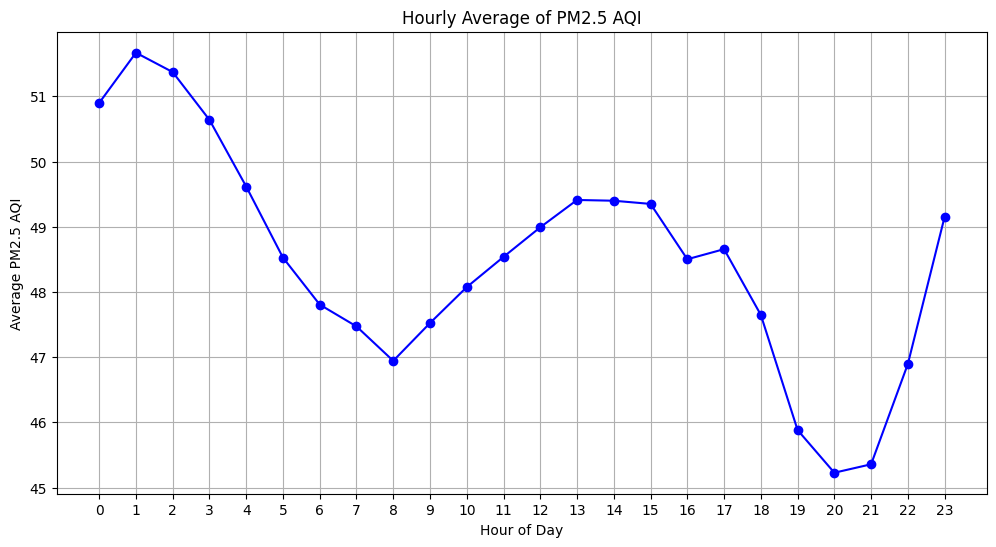

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='b')
plt.title('Hourly Average of PM2.5 AQI')
plt.xlabel('Hour of Day')
plt.ylabel('Average PM2.5 AQI')
plt.grid(True)
plt.xticks(np.arange(24))
plt.show()

Monthly

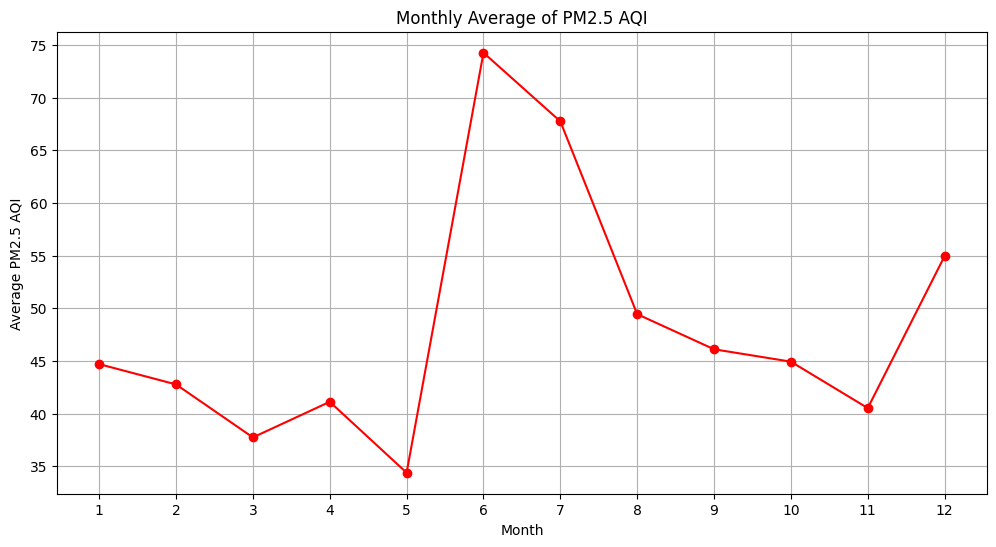

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='r')
plt.title('Monthly Average of PM2.5 AQI')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 AQI')
plt.grid(True)
plt.xticks(np.arange(1, 13))
plt.show()

Relevance to traffic busyness

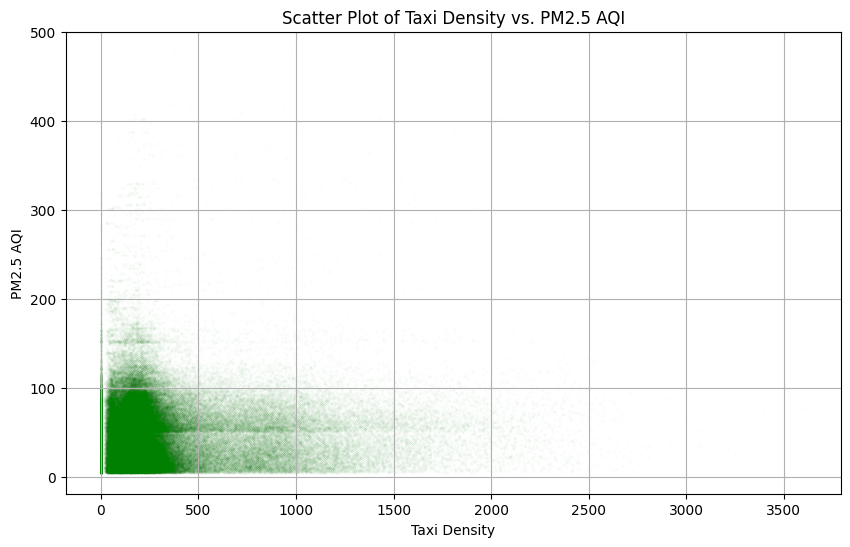

In [9]:
plt.figure(figsize=(10, 6))

point_size = 50
plt.scatter(df['taxi_density'], df['pm2.5_aqi'], s=0.001, c='green', alpha=0.5)
plt.title('Scatter Plot of Taxi Density vs. PM2.5 AQI')
plt.xlabel('Taxi Density')
plt.ylabel('PM2.5 AQI')
plt.grid(True)
plt.show()

In [10]:
df.columns

Index(['grid_code', 'time_stamp', 'taxi_density', 'pm2.5_aqi', 'humidity',
       'wind_direction', 'temp', 'wind_speed', 'wind_gust', 'pressure',
       'weather_id', 'datetime', 'hour', 'month'],
      dtype='object')

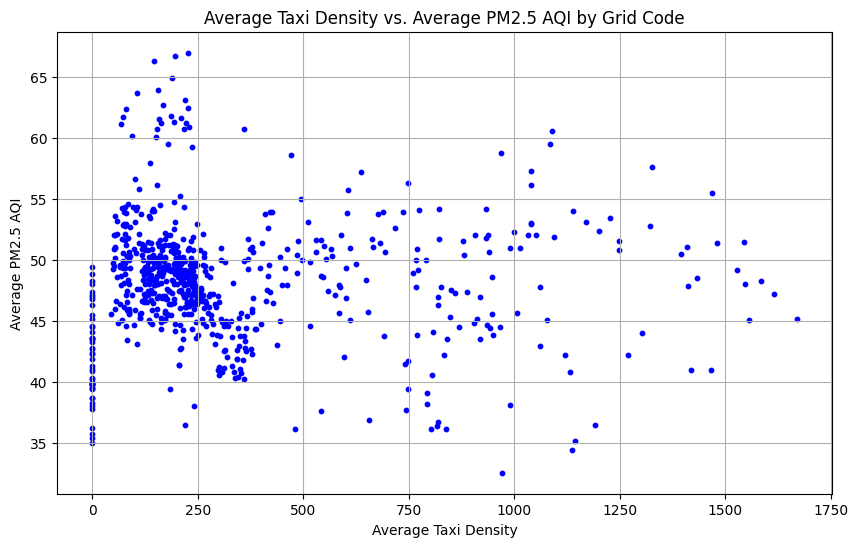

In [11]:
averages = df.groupby(['grid_code', 'hour'])[['taxi_density', 'pm2.5_aqi']].mean()

plt.figure(figsize=(10, 6))
plt.scatter(averages['taxi_density'], averages['pm2.5_aqi'], s=10, c='blue', alpha=1)
plt.title('Average Taxi Density vs. Average PM2.5 AQI by Grid Code')
plt.xlabel('Average Taxi Density')
plt.ylabel('Average PM2.5 AQI')
plt.grid(True)
plt.show()

Weather

C:\Users\Legion\AppData\Local\Temp\ipykernel_8012\1276468377.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_humidity = df.groupby('humidity_bin')['pm2.5_aqi'].mean()
C:\Users\Legion\AppData\Local\Temp\ipykernel_8012\1276468377.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp = df.groupby('temp_bin')['pm2.5_aqi'].mean()
C:\Users\Legion\AppData\Local\Temp\ipykernel_8012\1276468377.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

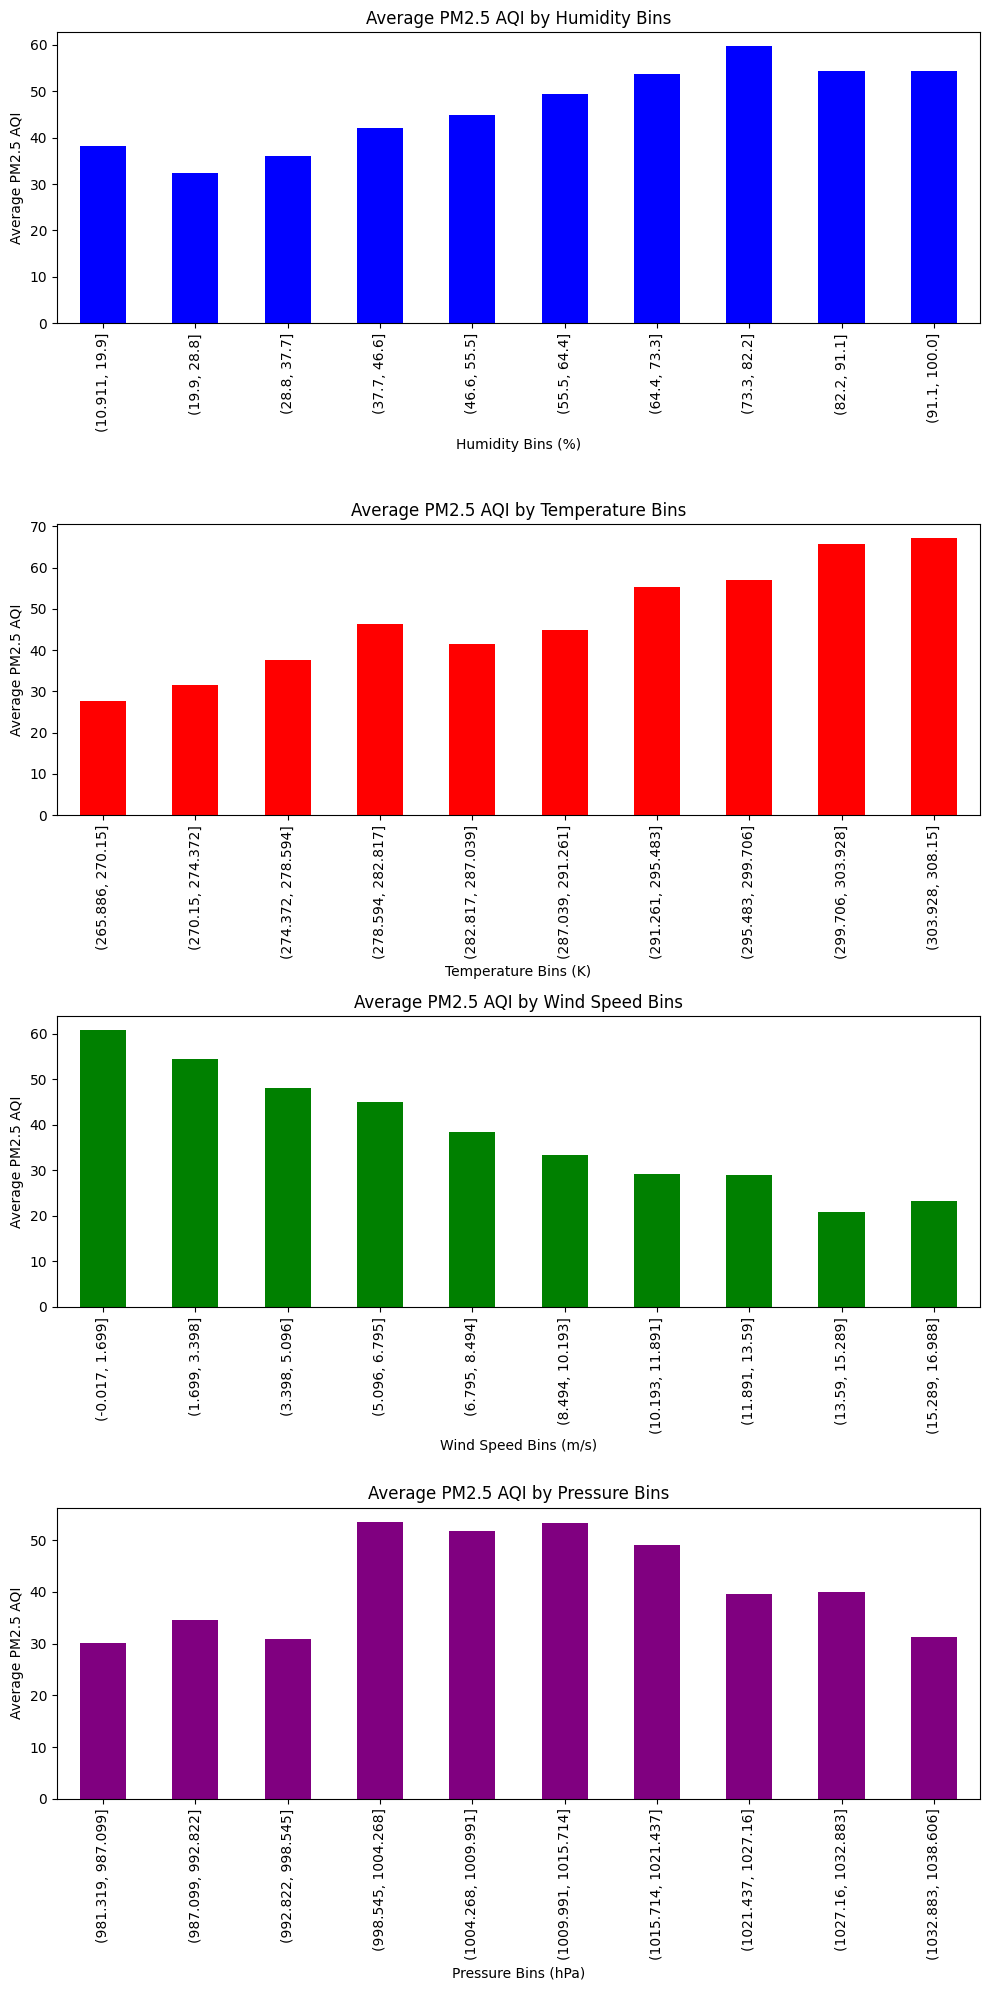

In [12]:
num_bins = 10

fig, axes = plt.subplots(4, 1, figsize=(10, 20))

df['humidity_bin'] = pd.cut(df['humidity'], bins=num_bins)
avg_humidity = df.groupby('humidity_bin')['pm2.5_aqi'].mean()
avg_humidity.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Average PM2.5 AQI by Humidity Bins')
axes[0].set_xlabel('Humidity Bins (%)')
axes[0].set_ylabel('Average PM2.5 AQI')

df['temp_bin'] = pd.cut(df['temp'], bins=num_bins)
avg_temp = df.groupby('temp_bin')['pm2.5_aqi'].mean()
avg_temp.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Average PM2.5 AQI by Temperature Bins')
axes[1].set_xlabel('Temperature Bins (K)')
axes[1].set_ylabel('Average PM2.5 AQI')

df['wind_speed_bin'] = pd.cut(df['wind_speed'], bins=num_bins)
avg_wind_speed = df.groupby('wind_speed_bin')['pm2.5_aqi'].mean()
avg_wind_speed.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Average PM2.5 AQI by Wind Speed Bins')
axes[2].set_xlabel('Wind Speed Bins (m/s)')
axes[2].set_ylabel('Average PM2.5 AQI')

df['pressure_bin'] = pd.cut(df['pressure'], bins=num_bins)
avg_pressure = df.groupby('pressure_bin')['pm2.5_aqi'].mean()
avg_pressure.plot(kind='bar', ax=axes[3], color='purple')
axes[3].set_title('Average PM2.5 AQI by Pressure Bins')
axes[3].set_xlabel('Pressure Bins (hPa)')
axes[3].set_ylabel('Average PM2.5 AQI')

plt.tight_layout()
plt.show()